In [6]:
import pandas as pd
import numpy as np
from apyori import apriori
from collections import Counter
from datetime import datetime
from itertools import combinations
import matplotlib.pyplot as plt


## Analisando todos os dados do dataset

### `aisles.csv`
Corredores do mercado


In [3]:
aisles = pd.read_parquet('../data/raw/aisles.parquet.gzip')


In [11]:
aisles.dtypes #*tipos de dados

aisle_id     int64
aisle       object
dtype: object

In [ ]:
aisles.head() #! nomes dos corredores

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [ ]:
aisles.isna().sum(axis = 0) #Não há valores nulos

aisle_id    0
aisle       0
dtype: int64

ACRESCENTAR EM CADA DATAFRAME PARA SALVAR O ARQUIVO OU EM CSV OU EM HDF5

df3.to_csv(os.getcwd()+"\\..\\..\\Data\\Processed\\df3_outlier.csv")

### `departments.csv`
Departamentos do mercado

In [4]:
departments = pd.read_parquet('../data/raw/departments.parquet.gzip')

In [ ]:
departments.dtypes

department_id     int64
department       object
dtype: object

In [ ]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [ ]:
departments.shape #! total de departamentos

(21, 2)

### `products.csv`

Produtos cadastrados no mercado

In [5]:
products = pd.read_parquet('../data/raw/products.parquet.gzip')

In [ ]:
products.dtypes

product_id        int64
product_name     object
aisle_id          int64
department_id     int64
dtype: object

In [ ]:
products.head()

#*modelos realacioanis
#! aisle_id = corredor onde se encontra o produto
#! department_id = departamwnto onde se encontra o produto

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [ ]:
 #! exemplo

aisles[aisles['aisle_id'] == 61]

,aisle_id,aisle
60,61,cookies cakes


In [ ]:
departments[departments['department_id'] == 19]

,department_id,department
18,19,snacks


In [ ]:
products.describe()

#! menor id = 1
#! maior id = 49688
#! são 134 corredores
#! são 21 departamentos

,product_id,aisle_id,department_id
count,49688.000000,49688.000000,49688.000000
mean,24844.500000,67.769582,11.728687
std,14343.834425,38.316162,5.850410
min,1.000000,1.000000,1.000000
25%,12422.750000,35.000000,7.000000
50%,24844.500000,69.000000,13.000000
75%,37266.250000,100.000000,17.000000
max,49688.000000,134.000000,21.000000


In [ ]:
products.shape

(49688, 4)

In [ ]:
 #!confirmando total de itens
len(set(products.product_id))  #! ids unicos

49688

In [ ]:
len(products.product_id.unique())

49688

In [ ]:
products.isna().sum(axis = 0)

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

### `orders.csv`

Compras realizadas pelos clientes

In [6]:
orders = pd.read_parquet('../data/raw/orders.parquet.gzip')

In [ ]:
orders.dtypes

order_id                    int64
user_id                     int64
eval_set                   object
order_number                int64
order_dow                   int64
order_hour_of_day           int64
days_since_prior_order    float64
dtype: object

*order_id - Id do pedido            
*user_id  - Id do usuário              
*eval_set   -      Separação dos dados. Usaremos os prior.       
*order_number -  Número do pedido          
*order_dow    - Dow - Day of week. Em que dia da semana foi feita a compra. Inicia no 0 e termina no 6.          
*order_hour_of_day  -  Hora do dia que foi feito a compra      
*days_since_prior_order  - Quantos dias de passaram desde a última compra.

In [ ]:
orders.head(11)#! cliente 1 iniciou sua compra (NaN) e fez 10 compras.

#!atenção ao dado NaN, não é nulo e sim ausente neste caso pois mostra
#! que é a 1º compra do cliente

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0
6,550135,1,prior,7,1,9,20.0
7,3108588,1,prior,8,1,14,14.0
8,2295261,1,prior,9,1,16,0.0
9,2550362,1,prior,10,4,8,30.0


In [ ]:
orders.shape

(3421083, 7)

In [ ]:
orders.eval_set.value_counts() #! não usaremos dados de treino e test.

#!pelo que percebi ela so mostra a localização de cada item

prior    3214874
train     131209
test       75000
Name: eval_set, dtype: int64

In [ ]:
 #! so uraremos os dados de prior.

orders = orders[orders.eval_set == 'prior']
orders.shape

(3214874, 7)

In [ ]:
orders.drop('eval_set', axis = 1, inplace=True) #! como so temos os prior, podemos excluir essa coluna

<ipython-input-192-007591f37f3d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders.drop('eval_set', axis = 1, inplace=True) #! como so temos os prior, podemos excluir essa coluna


In [ ]:
orders.describe()

#! o usuario faz no minimo 1 pedido e no máximo 99 pelo dataset(order_number)(isso pode ser uma restrição de quem coletou esses dados)
#!days_since_prior_order - minimo compra recorrente no mesmo dia ou no maximo 30 dias de intervalo
#! order_hour_of_day, mercado aparenta ser 24 horas.


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,3.214874e+06,3.214874e+06,3.214874e+06,3.214874e+06,3.214874e+06,3.008665e+06
mean,1.710827e+06,1.029701e+05,1.719107e+01,2.776364e+00,1.344347e+01,1.070724e+01
std,9.875206e+05,5.953411e+04,1.779950e+01,2.041806e+00,4.226246e+00,8.954180e+00
min,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.556832e+05,5.138500e+04,5.000000e+00,1.000000e+00,1.000000e+01,4.000000e+00
50%,1.711120e+06,1.026620e+05,1.100000e+01,3.000000e+00,1.300000e+01,7.000000e+00
75%,2.566034e+06,1.543720e+05,2.400000e+01,5.000000e+00,1.600000e+01,1.500000e+01
max,3.421083e+06,2.062090e+05,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01


In [ ]:
len(set(orders.user_id)) #! qtd de clientes nesse dataset

206209

In [ ]:
orders.isna().sum(axis = 0) #! o days_since_prior_order são NaN devido ser a primeira compra dos 206209 clientes

order_id                       0
user_id                        0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

In [ ]:
orders.loc[orders.days_since_prior_order.isna()] #!Visualização do NaN da 1º compra

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,1,2,8,NaN
11,2168274,2,1,2,11,NaN
26,1374495,3,1,1,14,NaN
39,3343014,4,1,6,11,NaN
45,2717275,5,1,3,12,NaN
...,...,...,...,...,...,...
3420930,969311,206205,1,4,12,NaN
3420934,3189322,206206,1,3,18,NaN
3421002,2166133,206207,1,6,19,NaN
3421019,2227043,206208,1,1,15,NaN


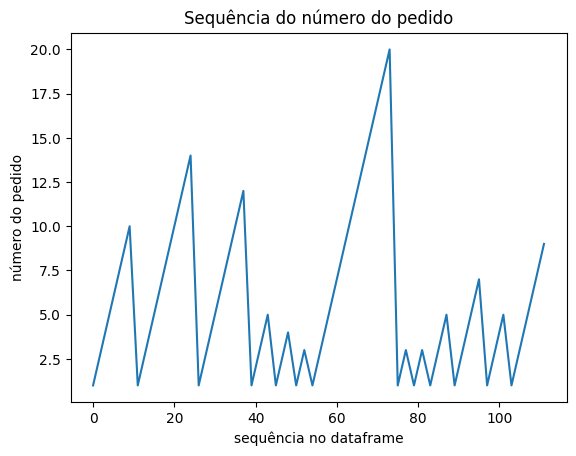

In [ ]:
 #!Grafiamente podemos ententender a compra de cada cliente

plt.plot(orders.order_number[:100]) #! filtrando apenas 100 clientes
plt.title('Sequência do número do pedido')
plt.xlabel('sequência no dataframe')
plt.ylabel('número do pedido');

#!1º usuario comprou 10 pedidos, o segundo quase 15 e etc...

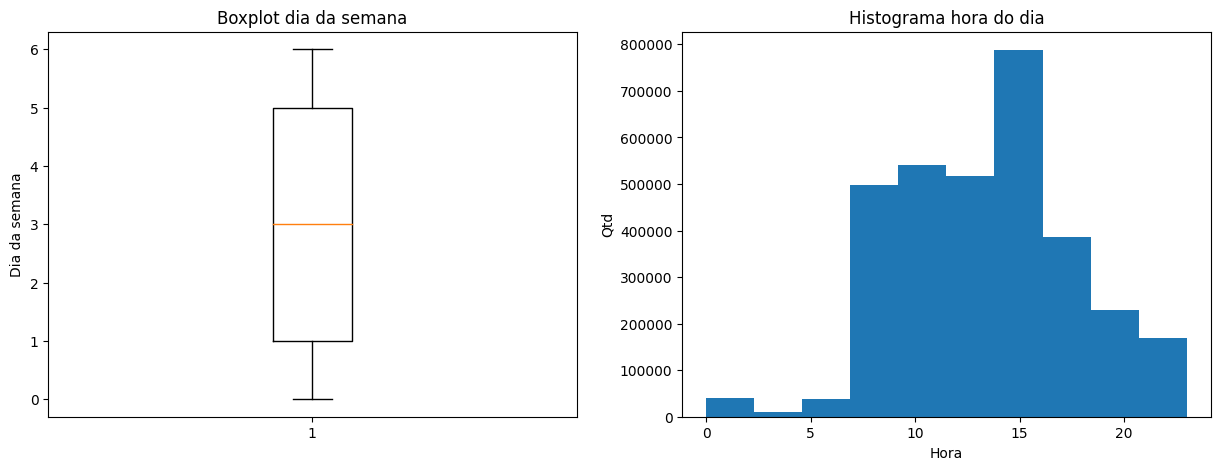

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].boxplot(orders.order_dow)
ax[0].set_title('Boxplot dia da semana')
ax[0].set_ylabel('Dia da semana')
ax[1].hist(orders.order_hour_of_day)
ax[1].set_title('Histograma hora do dia')
ax[1].set_xlabel('Hora')
ax[1].set_ylabel('Qtd');

#! o 3º dia tem a média  das compras da semana
#! as 15 horas temos o melhor horario de vendas.

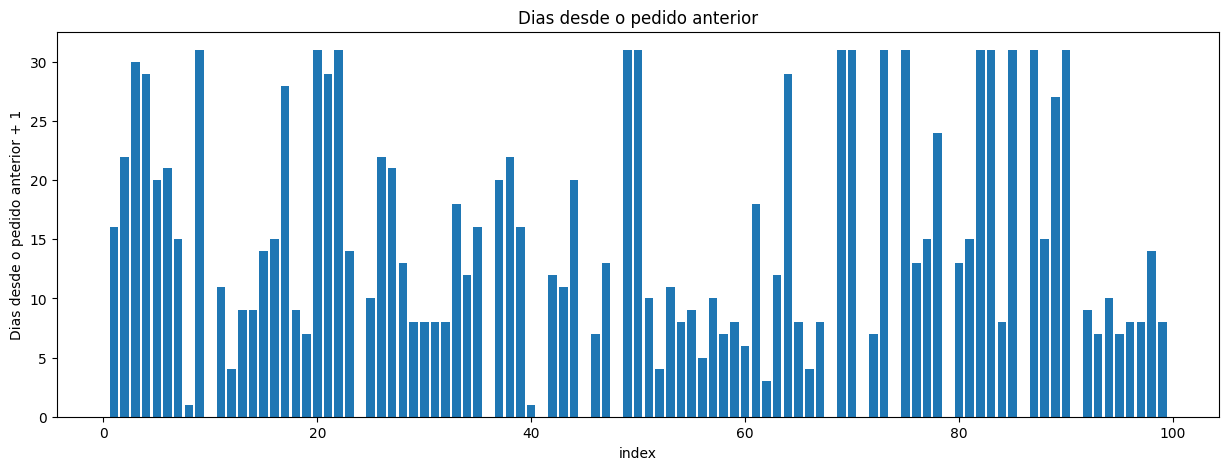

In [ ]:
plt.figure(figsize = (15,5))
plt.bar(range(100), orders.days_since_prior_order[:100] + 1)
plt.title('Dias desde o pedido anterior')
plt.xlabel('index')
plt.ylabel('Dias desde o pedido anterior + 1');

#! qtd de produto que cada cliente comprou. Frequência ou intervalo de cada compra.
#! o espaço em branco é a mudança de cliente, significan o NaN.

### `order_products(__prior).csv`

Ordens com divisão de dados para prior.

In [7]:
order_products = pd.read_parquet('../data/raw/order_products__prior.parquet.gzip')

In [27]:
order_products.dtypes

order_id             int64
product_id           int64
add_to_cart_order    int64
reordered            int64
dtype: object

In [23]:
order_products.head(11)

#!order_id indica tbm o cliente
#!Add_to_cart - ordem que o produto foi add ao carrinho
#!reordered(não tem haver com organização) aqui significa que já foi comprado pelo cliente alguma vez.

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
5,2,17794,6,1
6,2,40141,7,1
7,2,1819,8,1
8,2,43668,9,0
9,3,33754,1,1


In [28]:
order_products.shape #! mais de 32 milhões de produtos vendidos

(32434489, 4)

In [29]:
len(set(order_products.order_id)) #! numero de pedidos aproximadamente 3,2 milhões

3214874

In [ ]:
order_products.isna().sum(axis=0) #! não há valor nulo

order_id             0
product_id           0
add_to_cart_order    1
reordered            1
dtype: int64

## Exploração dos dados

### **DATAFRAME *orders***

In [ ]:
orders_apriori = orders.copy()

**Filtros por  *User***

In [ ]:
 #! teremos a qtd de compras de cada usuario

orders_by_user = orders.groupby('user_id')['order_number'].max()

In [ ]:
    #!add_to_card_order, nos diz alem da ordem de compra a quantidade de itens comprados.
    #! Logo usando merge podemos atribuir a cada usuário qtd de produto comprado

products_by_user = orders[['order_id', 'user_id']].merge(
    order_products[['order_id', 'add_to_cart_order']].groupby('order_id').max()
    .rename({'add_to_cart_order': 'order_size'}, axis=1), on='order_id'
)

In [ ]:
products_by_user.head(3)

,order_id,user_id,order_size
0,23391,7,11.0
1,68288,10,46.0
2,83395,10,30.0


In [ ]:
 #! exemplo desse filtro de agrupamento de qtd de compras por usuario
products_by_user[products_by_user.order_id==10]

,order_id,user_id,order_size
55614,10,135442,15.0


In [ ]:
 #! agora teremos os somatório total de qtd de produtos por usuario

products_by_user = products_by_user.drop('order_id', axis=1).groupby('user_id')['order_size'].sum()

In [ ]:
 #!qtd de compras de cada cliente
products_by_user.head(3)

user_id
7     11.0
10    76.0
13     5.0
Name: order_size, dtype: float64

In [ ]:
 #!o usuario(s) que mais fez compra, comprou 99 produtos

max(orders_by_user)

99

In [ ]:
 #!o usuario(s) que menos fez compra, comprou 3 produtos

min(orders_by_user)

3

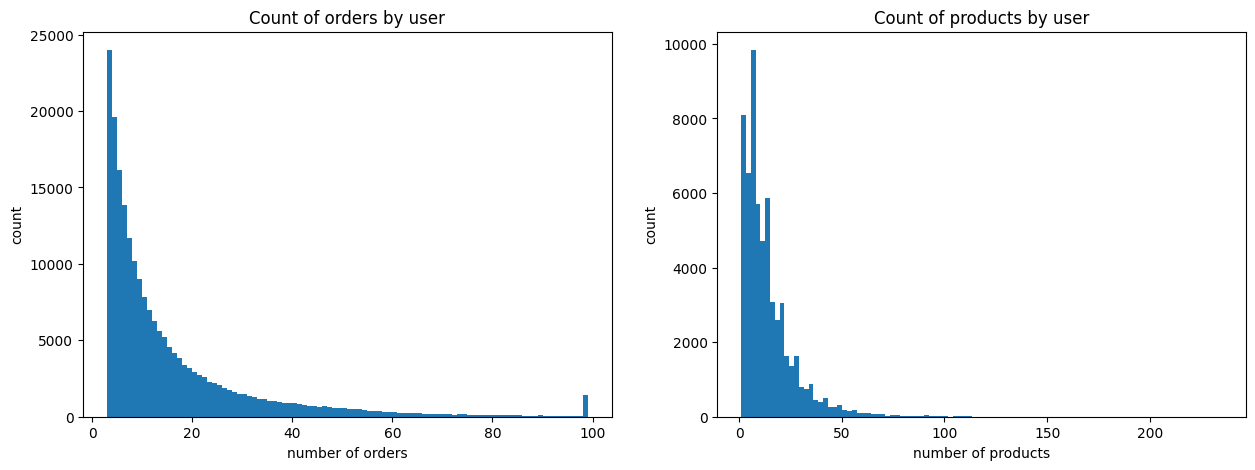

In [ ]:
 #!Vizualização da distribuição de compras por usuario e qtd compradas.
fig, ax = plt.subplots(1, 2, figsize=(15,5))
ax[0].hist(orders_by_user, bins = max(orders_by_user) - min(orders_by_user)) #! range
ax[0].set_title('Count of orders by user')
ax[0].set_xlabel('number of orders')
ax[0].set_ylabel('count')

ax[1].hist(products_by_user, bins = 100)
ax[1].set_title('Count of products by user')
ax[1].set_xlabel('number of products')
ax[1].set_ylabel('count');

**O gráfico da esquerda**

Nos mostra que há uma curva exponencial. Também é possível perceber que há limitação nesse dataset de 99 ordens. Se ele tiver feito 120 ordens ele muda para 99, por isso provávelmente temos esse pico no 99, onde mostra que aproximadamente 1000 pessoas compraram no minimo 99 produtos no mercado, a maior concentração dos clientes está abaixo de 20 compras, temos um grupo novo de clientes nesse mercado muito grande.

**O gráfico da direita**

Poucos clientes compraram mais de 1500 produtos. A maioria dos cleintes comprou no total entre 150 a 250 produtos.

In [ ]:
 #!Drop de colunas id para deixar o df pront para analises
orders_apriori.drop(['user_id','order_id'], axis=1, inplace=True)
orders_apriori.head(3)

,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1,2,8,NaN
1,2,3,7,15.0
2,3,3,12,21.0


**Filtros por *Order number***

In [ ]:
orders.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,1,2,8,NaN
1,2398795,1,2,3,7,15.0
2,473747,1,3,3,12,21.0
3,2254736,1,4,4,7,29.0
4,431534,1,5,4,15,28.0


In [ ]:
 #!contagem  de frenquencia de compra
'''temos 206209 usuarios ativos. Então o que podemos ver é todos os usuarios
fazem pelo menos 3 compras nesse mercado, depois vai diminuino. Por exemplo,
1374 pessoa compram 99 vezes '''

orders_by_order_number = orders.order_number.value_counts()
orders_by_order_number

1     206209
2     206209
3     206209
4     182223
5     162633
       ...  
95      1592
96      1525
97      1471
98      1421
99      1374
Name: order_number, Length: 99, dtype: int64

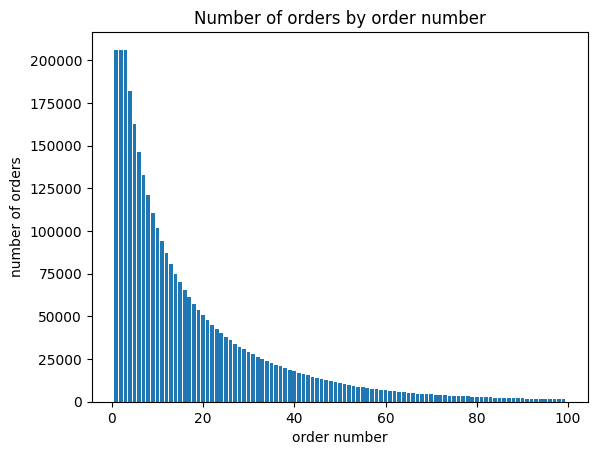

In [ ]:
 #!plot desse filtro
plt.bar(orders_by_order_number.index, orders_by_order_number)
plt.title('Number of orders by order number')
plt.xlabel('order number')
plt.ylabel('number of orders');

**ATENÇÃO**

Para regras de associação não podemos ter dados númericos e sim categórios, logo precisamos modificar o Df - orders para categórico, logo essa faixa de 3 a 99 deve ser categórica, criei um função para categorias.

In [ ]:
def order_number_categorical(order_number):
  if order_number in range(3):
    return 'order_number_1-3'
  if order_number in range(3, 5):
    return 'order_number_4-5'
  if order_number in range(5, 10):
    return 'order_number_6-10'
  if order_number in range(10, 20):
    return 'order_number_11-20'
  if order_number in range(20, 40):
    return 'order_number_21-40'
  if order_number in range(40, 60):
    return 'order_number_41-60'
  if order_number >= 60:
    return 'order_number_60+'

In [ ]:
orders_apriori.order_number = orders_apriori.order_number.map(order_number_categorical)

In [ ]:
orders_apriori.head()

,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,order_number_1-3,2,8,NaN
1,order_number_1-3,3,7,15.0
2,order_number_4-5,3,12,21.0
3,order_number_4-5,4,7,29.0
4,order_number_6-10,4,15,28.0


**Filtros por *Day of week***

Pedidos por dias da semana. O sábado é representado por 0, e segue-se essa sequencia.

*OBS*: Na base do Kaggle, não tem indicação de qual dia da semana é o dia 0(zero), nós adotamos adotamos o sábado pelo volume de vendas dos gráfios abaixo.

In [ ]:
orders_by_dow = orders.order_dow.value_counts()
orders_by_dow

0    557772
1    556705
2    441955
5    425982
6    418848
3    412400
4    401212
Name: order_dow, dtype: int64

**!** Como cada ordem acima, pode possuir mais de um produto, agora vamos criar um DF onde podemos ver quantos produtos foram vendidos em cada ordem

In [ ]:
products_by_dow = orders[['order_id', 'order_dow']].merge(
    order_products[['order_id', 'add_to_cart_order']].groupby('order_id').max().rename({'add_to_cart_order': 'order_size'}, axis = 1),
    on = 'order_id'
)

In [ ]:
products_by_dow.head()

,order_id,order_dow,order_size
0,23391,0,11.0
1,68288,5,46.0
2,83395,3,30.0
3,19256,1,5.0
4,86918,5,21.0


In [ ]:
 #!Vamos agrupar pelos dias da semana quantos produtos foram vendidos.
products_by_dow = products_by_dow.drop('order_id', axis=1).groupby('order_dow')['order_size'].sum()

In [ ]:
products_by_dow

order_dow
0    161066.0
1    148656.0
2    112119.0
3    101762.0
4     98822.0
5    110177.0
6    119041.0
Name: order_size, dtype: float64

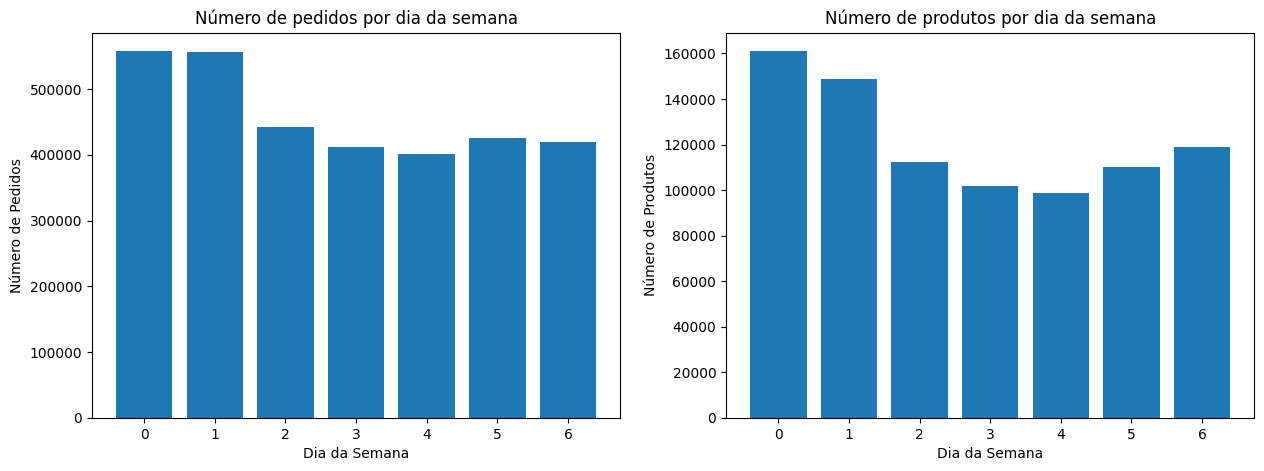

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].bar(orders_by_dow.index, orders_by_dow)
ax[0].set_title('Número de pedidos por dia da semana')
ax[0].set_xlabel('Dia da Semana')
ax[0].set_ylabel('Número de Pedidos')

ax[1].bar(products_by_dow.index, products_by_dow)
ax[1].set_title('Número de produtos por dia da semana')
ax[1].set_xlabel('Dia da Semana')
ax[1].set_ylabel('Número de Produtos');

Transformaremos em categorias as vendas no final de semana e também nos dias da semana

In [ ]:
def dow_categorical(dow):
  if dow in [0, 1]:
    return 'weekend'
  else:
    return 'weekday'

In [ ]:
orders_apriori.order_dow = orders_apriori.order_dow.map(dow_categorical)

In [ ]:
orders_apriori.head()

,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,order_number_1-3,weekday,8,NaN
1,order_number_1-3,weekday,7,15.0
2,order_number_4-5,weekday,12,21.0
3,order_number_4-5,weekday,7,29.0
4,order_number_6-10,weekday,15,28.0


**Filtros por *Hour of day***

In [ ]:
#Pedidos por hora
orders_by_hour = orders.order_hour_of_day.value_counts().sort_index()
orders_by_hour

0      21372
1      11596
2       7070
3       5120
4       5175
5       8972
6      28792
7      86656
8     168321
9     243496
10    271885
11    268006
12    256206
13    261174
14    265556
15    266132
16    255949
17    214080
18    170998
19    131620
20     98109
21     73436
22     57540
23     37613
Name: order_hour_of_day, dtype: int64

In [ ]:
#Produtos por hora
products_by_hour = orders[['order_id', 'order_hour_of_day']].merge(
    order_products[['order_id', 'add_to_cart_order']].groupby('order_id').max().rename({'add_to_cart_order': 'order_size'}, axis = 1),
    on = 'order_id'
)
products_by_hour = products_by_hour.drop('order_id', axis = 1).groupby('order_hour_of_day')['order_size'].sum()

In [ ]:
products_by_hour

order_hour_of_day
0      5878.0
1      2999.0
2      1946.0
3      1360.0
4      1212.0
5      2180.0
6      7807.0
7     23492.0
8     46826.0
9     65238.0
10    71458.0
11    71013.0
12    69665.0
13    69666.0
14    70529.0
15    69565.0
16    65465.0
17    55750.0
18    43260.0
19    32421.0
20    26264.0
21    20217.0
22    16654.0
23    10778.0
Name: order_size, dtype: float64

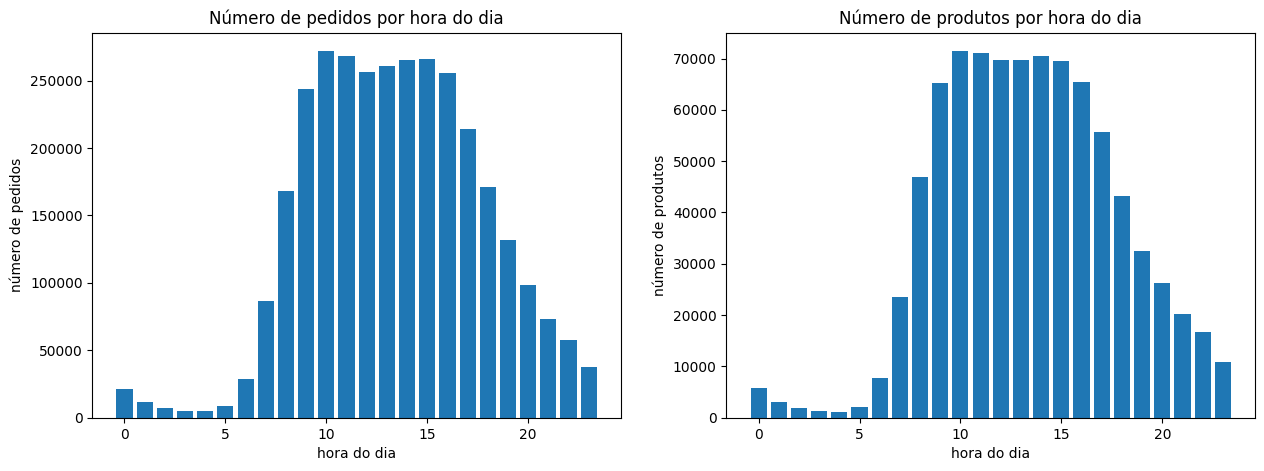

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].bar(orders_by_hour.index, orders_by_hour)
ax[0].set_title('Número de pedidos por hora do dia')
ax[0].set_xlabel('hora do dia')
ax[0].set_ylabel('número de pedidos')

ax[1].bar(products_by_hour.index, products_by_hour)
ax[1].set_title('Número de produtos por hora do dia')
ax[1].set_xlabel('hora do dia')
ax[1].set_ylabel('número de produtos');

Transformando a varável horas para categórica.

In [ ]:
def hour_categorical(hour):
  if hour in range(7):
    return 'early_hours'
  if hour in range(7,10):
    return 'hour_' + str(hour)
  if hour in range(10, 17):
    return 'peak_hours'
  if hour in range(17, 24):
    return 'hour_' + str(hour)

In [ ]:
orders_apriori.order_hour_of_day = orders_apriori.order_hour_of_day.map(hour_categorical)
orders_apriori.head()

,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,order_number_1-3,weekday,hour_8,NaN
1,order_number_1-3,weekday,hour_7,15.0
2,order_number_4-5,weekday,peak_hours,21.0
3,order_number_4-5,weekday,hour_7,29.0
4,order_number_6-10,weekday,peak_hours,28.0


**Filtros por *days_since_prior_order***

Intervalo dos pedidos

**OBS!** Nesse caso os clientes voltam no máximo 30 dias depois, há um manipulação na base de dados para não ultrapassar de 30 dias.

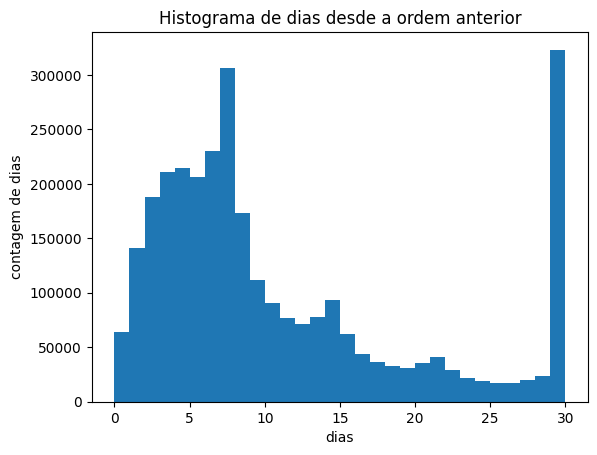

In [ ]:
plt.hist(orders.days_since_prior_order, bins = 30)
plt.title('Histograma de dias desde a ordem anterior')
plt.xlabel('dias')
plt.ylabel('contagem de dias');

OBS! Cada pico no intervalo de 7 dias, mostra os clientes que compram semanalemnte. O Pico de 30, mostra o cliente que compra mensal, porém, como ta padronizado no máximo 30 dias, pessoas que voltaram depois de 30 dias, ficarão todos em 30

In [ ]:
def interval_categorical(interval):
  if np.isnan(interval):
    return 'first_order'
  elif interval in [7, 14, 21]:
    return 'interval_weekly'
  elif interval == 30:
    return 'interval_30+'
  else:
    return 'interval_others'

In [ ]:
orders_apriori.days_since_prior_order = orders_apriori.days_since_prior_order.map(interval_categorical)
orders_apriori.head()

,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,order_number_1-3,weekday,hour_8,first_order
1,order_number_1-3,weekday,hour_7,interval_others
2,order_number_4-5,weekday,peak_hours,interval_weekly
3,order_number_4-5,weekday,hour_7,interval_others
4,order_number_6-10,weekday,peak_hours,interval_others


### **DATAFRAME *order_products***

#### Produtos recomprados (reordered)

In [ ]:
products_id_to_name = {k: v for k, v in zip(products.product_id, products.product_name)}
print(products_id_to_name)

{1: 'Chocolate Sandwich Cookies', 2: 'All-Seasons Salt', 3: 'Robust Golden Unsweetened Oolong Tea', 4: 'Smart Ones Classic Favorites Mini Rigatoni With Vodka Cream Sauce', 5: 'Green Chile Anytime Sauce', 6: 'Dry Nose Oil', 7: 'Pure Coconut Water With Orange', 8: "Cut Russet Potatoes Steam N' Mash", 9: 'Light Strawberry Blueberry Yogurt', 10: 'Sparkling Orange Juice & Prickly Pear Beverage', 11: 'Peach Mango Juice', 12: 'Chocolate Fudge Layer Cake', 13: 'Saline Nasal Mist', 14: 'Fresh Scent Dishwasher Cleaner', 15: 'Overnight Diapers Size 6', 16: 'Mint Chocolate Flavored Syrup', 17: 'Rendered Duck Fat', 18: 'Pizza for One Suprema  Frozen Pizza', 19: 'Gluten Free Quinoa Three Cheese & Mushroom Blend', 20: 'Pomegranate Cranberry & Aloe Vera Enrich Drink', 21: 'Small & Medium Dental Dog Treats', 22: 'Fresh Breath Oral Rinse Mild Mint', 23: 'Organic Turkey Burgers', 24: 'Tri-Vi-Sol® Vitamins A-C-and D Supplement Drops for Infants', 25: 'Salted Caramel Lean Protein & Fiber Bar', 26: 'Fancy F

In [ ]:
order_products_names = order_products.copy()
order_products_names['product_name'] = order_products_names.product_id.map(lambda x: products_id_to_name[x])


In [ ]:
order_products_names

,order_id,product_id,add_to_cart_order,reordered,product_name
0,2,33120,1.0,1.0,Organic Egg Whites
1,2,28985,2.0,1.0,Michigan Organic Kale
2,2,9327,3.0,0.0,Garlic Powder
3,2,45918,4.0,1.0,Coconut Butter
4,2,30035,5.0,0.0,Natural Sweetener
...,...,...,...,...,...
851639,90230,20919,1.0,1.0,Baby Spinach Salad
851640,90230,21377,2.0,1.0,Multigrain Wheat Thins Crackers
851641,90230,24852,3.0,1.0,Banana
851642,90230,44632,4.0,1.0,Sparkling Water Grapefruit


Venda do produto pela 1º vez (0) e o quanto o produto foi revendido(1)

In [ ]:
reorder_proportion = pd.crosstab(order_products_names.product_name, order_products_names.reordered)
reorder_proportion

reordered,0.0,1.0
product_name,,
#2 Coffee Filters,14,7
#2 Cone White Coffee Filters,1,0
#4 Natural Brown Coffee Filters,2,2
& Go! Hazelnut Spread + Pretzel Sticks,3,2
+Energy Black Cherry Vegetable & Fruit Juice,0,1
...,...,...
with Xylitol Original Flavor 18 Sticks Sugar Free Gum,4,4
with Xylitol Unwrapped Spearmint 50 Sticks Sugar Free Gum,2,1
with Xylitol Watermelon Twist 18 Sticks Sugar Free Gum,0,2


Ordenando os produtos que foram comprados pela primeira vez na coluna 0 e na coluna 1, o quanto recompraram.

In [ ]:
reorder_proportion.sort_values(by = 0, ascending=False)

reordered,0.0,1.0
product_name,,
Banana,2013,10590
Bag of Organic Bananas,1737,8404
Organic Strawberries,1594,5401
Organic Baby Spinach,1424,4951
Large Lemon,1204,2823
...,...,...
Krunchers Original Kettle Cooked Chips,0,1
Mushroom Takatak Entree,0,1
Crunchy Cheese Curls,0,1


Ordenando pela coluna 1 (Recompra)

In [ ]:
reorder_proportion.sort_values(by = 1, ascending=False)

reordered,0.0,1.0
product_name,,
Banana,2013,10590
Bag of Organic Bananas,1737,8404
Organic Strawberries,1594,5401
Organic Baby Spinach,1424,4951
Organic Hass Avocado,1166,4454
...,...,...
Organic Red Quinoa,3,0
Cherry Cassis Sparkling Fermented Tea,1,0
Organic Red Thai Hom Mali Jasmine Rice,1,0


Valores de vendas pela primeira vez e recompra em percentual.

In [ ]:
reorder_proportion['total'] = reorder_proportion.sum(axis = 1)
reorder_proportion['0.perc'] = reorder_proportion[0] / reorder_proportion['total']
reorder_proportion['1.perc'] = reorder_proportion[1] / reorder_proportion['total']

In [ ]:
reorder_proportion.head()

reordered,0.0,1.0,total,0.perc,1.perc
product_name,,,,,
#2 Coffee Filters,14,7,21,0.666667,0.333333
#2 Cone White Coffee Filters,1,0,1,1.000000,0.000000
#4 Natural Brown Coffee Filters,2,2,4,0.500000,0.500000
& Go! Hazelnut Spread + Pretzel Sticks,3,2,5,0.600000,0.400000
+Energy Black Cherry Vegetable & Fruit Juice,0,1,1,0.000000,1.000000


In [ ]:
#Produtos vendidos inicialmente(0)
#Valores igual a 1, significam que só teve a venda inicial ou produto saiu do estoque.
reorder_proportion.sort_values(by =
                               ['0.perc', 'total'], ascending = False)[
                               ['0.perc', 'total']]

reordered,0.perc,total
product_name,,
100% Pure Corn Starch,1.0,38
Seasoning Paprika,1.0,38
Basil Leaves,1.0,24
Ground Turmeric,1.0,22
Cream Of Tartar,1.0,20
...,...,...
"\""Mies Vanilla Rohe\"" Ice Cream Bars",0.0,1
rich kiss Olive & Aloe Moisturizer 2 in 1,0.0,1
with Twist Ties Sandwich & Storage Bags,0.0,1


In [ ]:
#Produto recomprado(1)
#Valores mais altos, indicam grande possibilidade de recompra.
reorder_proportion.sort_values(by = ['1.perc', 'total'], ascending = False)[['1.perc', 'total']]

reordered,1.perc,total
product_name,,
"Coconut Water, Real",1.0,26
Alkalized Water,1.0,15
Diet Peach,1.0,15
Lamb Rib Chops,1.0,11
Organic Colorado Cracked Wheat Bread,1.0,11
...,...,...
for Men Energy Face Scrub,0.0,1
iChef Casserole Pans with Lids (10 7/16 in x 8 in x 1 3/4 in),0.0,1
pumpkin spice,0.0,1


In [ ]:
reorder_proportion.total.sort_values(ascending=False)

product_name
Banana                                      12603
Bag of Organic Bananas                      10141
Organic Strawberries                         6995
Organic Baby Spinach                         6375
Organic Hass Avocado                         5620
                                            ...  
Organic Split Pea & Potato Soup                 1
Cherimoya                                       1
Chenin Blanc Viognier                           1
Organic Spring Mix With Herbs                   1
with a Splash of Pineapple Coconut Water        1
Name: total, Length: 33743, dtype: int64

#### Produtos não comprados

In [ ]:
products_bought = sorted(order_products.product_id.unique())
print(len(products_bought), len(products))

33744 49688


Essa diferença acima mostra que há uma diferença. No valor 49677 mostra os produtos que foram vendidos em todos os pedidos. No valor 49688 é a quantidade de produtos em nosso dataframe products.

 *Sendo assim temos 11 produtos que não foram vendidos.*

In [ ]:
products_not_bought = list(products.product_id[~products.product_id.isin(products_bought)])
products_not_bought

In [ ]:
[products_id_to_name[product] for product in products_not_bought]

['Green Chile Anytime Sauce',
 'Dry Nose Oil',
 'Pure Coconut Water With Orange',
 'Peach Mango Juice',
 'Saline Nasal Mist',
 'Mint Chocolate Flavored Syrup',
 'Rendered Duck Fat',
 'Pomegranate Cranberry & Aloe Vera Enrich Drink',
 'Small & Medium Dental Dog Treats',
 'Fresh Breath Oral Rinse Mild Mint',
 'Tri-Vi-Sol® Vitamins A-C-and D Supplement Drops for Infants',
 'White Pearl Onions',
 'Ultra Antibacterial Dish Liquid',
 'Daily Tangerine Citrus Flavored Beverage',
 'Whole Wheat Tortillas',
 'Ramen Noodles Soup Chicken Mushroom Flavor',
 'Vanilla with Almond Milk Iced Coffee',
 'Organic Honeycrisp Apples',
 'Spinach Basil Garlic Linguini',
 'Nutter Butter Cookie Bites Go-Pak',
 'French  Tarragon Wine Vinegar',
 'Soppressata Piccante',
 'Probiotics High Potency Capsules',
 'Yogurt Fruit Dip Sliced Apples',
 'Smorz Cereal',
 'Kind Prenatal Once Daily',
 'Meat In The Middle Large Rawhide Chews',
 'Sprouted Kale Cracker',
 'Easy Grab 9\\"x13\\" Oblong Glass Bakeware',
 'Grape Leaf Hu

Verificação de segurança para veriricar se todos os produtos estão de fato no DataFrame, isso se dá para não gerar alguma regra de associação inválida.

In [ ]:
products_not_registered = list(pd.Series(products_bought)[~pd.Series(products_bought).isin(products.product_id)])
print(len(products_not_registered), products_not_registered)

0 []


#### Tamanho da Cesta de Compras

In [ ]:
#Produtos por pedido
cart_size = order_products.groupby('order_id')['add_to_cart_order'].max()
cart_size

order_id
2         9.0
3         8.0
4        13.0
5        26.0
6         3.0
         ... 
90223    17.0
90227     9.0
90228     1.0
90229     8.0
90230     4.0
Name: add_to_cart_order, Length: 84748, dtype: float64

In [ ]:
#Contagem da quantidade de vendas por nº de produtos
cart_size = cart_size.value_counts()
cart_size

6.0      6063
5.0      5999
4.0      5862
7.0      5812
8.0      5386
         ... 
68.0        1
74.0        1
65.0        1
60.0        1
109.0       1
Name: add_to_cart_order, Length: 74, dtype: int64

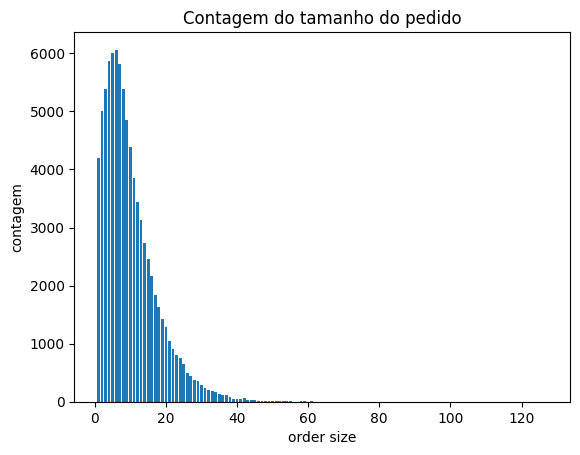

In [ ]:
plt.bar(cart_size.index, cart_size)
plt.title('Contagem do tamanho do pedido')
plt.xlabel('order size')
plt.ylabel('contagem');

A maior parte das ordens possuem poucos produtos.

#### Produtos mais frequentes

In [ ]:
order_products_names

,order_id,product_id,add_to_cart_order,reordered,product_name
0,2,33120,1.0,1.0,Organic Egg Whites
1,2,28985,2.0,1.0,Michigan Organic Kale
2,2,9327,3.0,0.0,Garlic Powder
3,2,45918,4.0,1.0,Coconut Butter
4,2,30035,5.0,0.0,Natural Sweetener
...,...,...,...,...,...
851639,90230,20919,1.0,1.0,Baby Spinach Salad
851640,90230,21377,2.0,1.0,Multigrain Wheat Thins Crackers
851641,90230,24852,3.0,1.0,Banana
851642,90230,44632,4.0,1.0,Sparkling Water Grapefruit


Organizando pela ordem de compra.

In [ ]:
add_to_cart = pd.crosstab(order_products_names.product_name, order_products_names.add_to_cart_order)
add_to_cart

add_to_cart_order,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,118.0,119.0,120.0,121.0,122.0,123.0,124.0,125.0,126.0,127.0
product_name,,,,,,,,,,,,,,,,,,,,,
#2 Coffee Filters,2,1,2,2,1,4,0,2,0,1,...,0,0,0,0,0,0,0,0,0,0
#2 Cone White Coffee Filters,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
#4 Natural Brown Coffee Filters,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
& Go! Hazelnut Spread + Pretzel Sticks,0,1,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
+Energy Black Cherry Vegetable & Fruit Juice,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
with Xylitol Original Flavor 18 Sticks Sugar Free Gum,0,0,1,0,0,2,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
with Xylitol Unwrapped Spearmint 50 Sticks Sugar Free Gum,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
with Xylitol Watermelon Twist 18 Sticks Sugar Free Gum,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Vaos ver apenas 5 compras.
for i in range(1,6):
  print('ORDER = ', i)
  print(add_to_cart.sort_values(by = i, ascending=False)[i][:5])
  print('\n')

ORDER =  1
product_name
Banana                    2925
Bag of Organic Bananas    2104
Organic Whole Milk         813
Organic Strawberries       724
Organic Baby Spinach       652
Name: 1.0, dtype: int64


ORDER =  2
product_name
Banana                    2183
Bag of Organic Bananas    1633
Organic Strawberries       783
Organic Hass Avocado       688
Organic Baby Spinach       655
Name: 2.0, dtype: int64


ORDER =  3
product_name
Banana                    1608
Bag of Organic Bananas    1345
Organic Strawberries       734
Organic Baby Spinach       659
Organic Hass Avocado       643
Name: 3.0, dtype: int64


ORDER =  4
product_name
Banana                    1131
Bag of Organic Bananas     985
Organic Strawberries       698
Organic Baby Spinach       617
Organic Hass Avocado       562
Name: 4.0, dtype: int64


ORDER =  5
product_name
Banana                    877
Bag of Organic Bananas    797
Organic Strawberries      600
Organic Baby Spinach      526
Organic Hass Avocado      504
Name: 

## Regras de associação

*Algumas definições dos parâmetros do Apriori:*

![image.png](attachment:image.png)

[Fonte: Winkpédia](https://pt.wikipedia.org/wiki/Regras_de_associa%C3%A7%C3%A3o)

### Hábitos de compras

In [ ]:
orders_apriori.head()

,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,order_number_1-3,weekday,hour_8,first_order
1,order_number_1-3,weekday,hour_7,interval_others
2,order_number_4-5,weekday,peak_hours,interval_weekly
3,order_number_4-5,weekday,hour_7,interval_others
4,order_number_6-10,weekday,peak_hours,interval_others


In [ ]:
orders_apriori.shape

(3214874, 4)

**OBS** - Como o Apriori exige que os dados venham em formato de lista iremos converter o DF para lista.

In [ ]:
transactions = []
#Pegamos cada linha e coluna para dentro da lista.
for i in range(orders_apriori.shape[0]):
  transactions.append([str(orders_apriori.values[i, j]) for j in range(orders_apriori.shape[1])])

In [ ]:
transactions[:4]

[['order_number_1-3', 'weekday', 'hour_8', 'first_order'],
 ['order_number_1-3', 'weekday', 'hour_7', 'interval_others'],
 ['order_number_4-5', 'weekday', 'peak_hours', 'interval_weekly'],
 ['order_number_4-5', 'weekday', 'hour_7', 'interval_others']]

Usaremos o suporte minimo 0.5%, confiança de 0.2 e lift de 2

OBS.: Como o Dataset é muito grande é ideal usar a confiança baixa.

In [ ]:
start = datetime.now()
rules = apriori(transactions, min_support = 0.005, min_confidence = 0.2, min_lift = 2)
results = list(rules)
print('Execution time: ', datetime.now() - start)

Execution time:  0:02:13.850388


In [ ]:
#Qtd de regras de associação, cada resultado tem 2 ou mais regras de associação
len(results)

12

In [ ]:
results

[RelationRecord(items=frozenset({'first_order', 'order_number_1-3'}), support=0.06414217166831422, ordered_statistics=[OrderedStatistic(items_base=frozenset({'first_order'}), items_add=frozenset({'order_number_1-3'}), confidence=1.0, lift=7.795183527392111), OrderedStatistic(items_base=frozenset({'order_number_1-3'}), items_add=frozenset({'first_order'}), confidence=0.5, lift=7.795183527392111)]),
 RelationRecord(items=frozenset({'order_number_4-5', 'interval_30+'}), support=0.026266348230132814, ordered_statistics=[OrderedStatistic(items_base=frozenset({'interval_30+'}), items_add=frozenset({'order_number_4-5'}), confidence=0.2758340220228198, lift=2.2829520372075183), OrderedStatistic(items_base=frozenset({'order_number_4-5'}), items_add=frozenset({'interval_30+'}), confidence=0.21739455039749556, lift=2.2829520372075187)]),
 RelationRecord(items=frozenset({'peak_hours', 'first_order', 'order_number_1-3'}), support=0.036973766312458904, ordered_statistics=[OrderedStatistic(items_base

In [ ]:
results[0]

RelationRecord(items=frozenset({'first_order', 'order_number_1-3'}), support=0.06414217166831422, ordered_statistics=[OrderedStatistic(items_base=frozenset({'first_order'}), items_add=frozenset({'order_number_1-3'}), confidence=1.0, lift=7.795183527392111), OrderedStatistic(items_base=frozenset({'order_number_1-3'}), items_add=frozenset({'first_order'}), confidence=0.5, lift=7.795183527392111)])

Para uma melhor visualização do resultado acima, segue detalhes:
````
RelationRecord(items=frozenset({'order_number_1-3', 'first_order'}),
               support=0.06414217166831422,
                 ordered_statistics=[
                OrderedStatistic(items_base=frozenset({'first_order'}),
                                items_add=frozenset({'order_number_1-3'}),
                                confidence=1.0,
                                lift=7.795183527392111),
                OrderedStatistic(items_base=frozenset({'order_number_1-3'}),
                                items_add=frozenset({'first_order'}),
                                confidence=0.5,
                                lift=7.795183527392111)])
````

Temos 2 OrderedStatistic pois ele inverte a ordem de compras para testar a confiança. Por exemplo, há uma associação conhecida de um mercado de quem compra fraldas, compra cerveka, mas o contrário é verdadeiro?

No exemplo acima, a confinça quando da 100% é por que de fato a primiera compra do cliente estará entre a order_number_1-3. Já na segunda tentativa, a confiança diminui, pois temos mais possibilidade.

Detalhando o resultado acima:

In [ ]:
results[0]

RelationRecord(items=frozenset({'first_order', 'order_number_1-3'}), support=0.06414217166831422, ordered_statistics=[OrderedStatistic(items_base=frozenset({'first_order'}), items_add=frozenset({'order_number_1-3'}), confidence=1.0, lift=7.795183527392111), OrderedStatistic(items_base=frozenset({'order_number_1-3'}), items_add=frozenset({'first_order'}), confidence=0.5, lift=7.795183527392111)])

In [ ]:
results[0][0]

frozenset({'first_order', 'order_number_1-3'})

In [ ]:
results[0][1]

0.06414217166831422

In [ ]:
#criando variavel para as duas regras do resultado 0
r = results[0][2]
r

[OrderedStatistic(items_base=frozenset({'first_order'}), items_add=frozenset({'order_number_1-3'}), confidence=1.0, lift=7.795183527392111),
 OrderedStatistic(items_base=frozenset({'order_number_1-3'}), items_add=frozenset({'first_order'}), confidence=0.5, lift=7.795183527392111)]

In [ ]:
type(r)

list

In [ ]:
r[0]

OrderedStatistic(items_base=frozenset({'first_order'}), items_add=frozenset({'order_number_1-3'}), confidence=1.0, lift=7.795183527392111)

In [ ]:
r[1]

OrderedStatistic(items_base=frozenset({'order_number_1-3'}), items_add=frozenset({'first_order'}), confidence=0.5, lift=7.795183527392111)

In [ ]:
#confiança
r[0][2]

1.0

In [ ]:
#lift
r[0][3]

7.795183527392111

Transformando as regras num DataFrame

In [ ]:
A = [] #1º Regra
B = [] #2º Regra
support = []
confidence = []
lift = []

for result in results:
  s = result[1] #suporte
  result_rules = result[2] #regras
  for result_rule in result_rules:
    a = list(result_rule[0])
    b = list(result_rule[1])
    c = result_rule[2] #confiança
    l = result_rule[3] #lift
    A.append(a)
    B.append(b)
    support.append(s)
    confidence.append(c)
    lift.append(l)

rules_df = pd.DataFrame({
    'A': A,
    'B': B,
    'support': support,
    'confidence': confidence,
    'lift': lift
})

#vamos ordenar por lift
rules_df = rules_df.sort_values(by = 'lift', ascending = False).reset_index(drop = True)
len(rules_df)

38

In [ ]:
A[0]

['first_order']

In [ ]:
B[0]

['order_number_1-3']

In [ ]:
A[1], B[1] #posiçao 1

(['order_number_1-3'], ['first_order'])

In [ ]:
rules_df

,A,B,support,confidence,lift
0,"[peak_hours, first_order]","[order_number_1-3, weekend]",0.013600,0.367834,8.057873
1,"[order_number_1-3, weekend]","[peak_hours, first_order]",0.013600,0.297930,8.057873
2,"[first_order, weekend]","[peak_hours, order_number_1-3]",0.013600,0.594952,8.047623
3,"[order_number_1-3, weekend]",[first_order],0.022859,0.500763,7.807082
4,[first_order],"[order_number_1-3, weekend]",0.022859,0.356386,7.807082
5,[first_order],"[peak_hours, order_number_1-3, weekend]",0.013600,0.212032,7.799732
6,"[peak_hours, order_number_1-3, weekend]",[first_order],0.013600,0.500292,7.799732
7,"[peak_hours, order_number_1-3]",[first_order],0.036974,0.500126,7.797151
8,[first_order],"[peak_hours, order_number_1-3]",0.036974,0.576435,7.797151
9,[first_order],"[peak_hours, weekday, order_number_1-3]",0.023374,0.364402,7.795650


*Interpretação de rules_df--(insight):*

*   rules_df[0] ---> Se a pessoa esta fazendo compra no horário de pico(peak_hours) e é sua primeira compra, ela tem preferência de comprar no final de semana. Isso daria a oportunidade do mercardo realizar uma promoção para esses novos clientes, pois essa tendência de comprar no final de semana e horário de pico é uma oportunidade.

*   rules_df[1] ---> Se a compra esta sendo feita no final de semana e está entre a primeira ou terceira compra do cliente, ele fará a compra no horário de pico e é a primeira ordem.

*   rules_df[32] ---> Se o cliente esta fazendo entre a 4º ou 5º compra, ela tem a tendência de dá um intervalo de 30 dias para comprar novamente. Outra oportunidade para tentar atrair o cliente para voltar ao mercado com mais freqência, talvez uma promoção ou e-mail(sms) marketing ajude.

*   rules_df[34] ---> Se a pessoa está fazendo as compras no horário de pico e tem um intervalo médio de 30 dias, ela deve está na 4º ou 5º compra. Bem parecido com a regra acima. O Mercado poderia dá uma sugestão para ela vir num horário com menos movimento.

*   rules_df[14] e [16], provam que para a primeira ordem as pessoasnão tem preferência se é durante a semana ou final de semana e sim horário de pico.

**Conclusão-----> temos diversas oportunidades, temos que observar bem cada regra. Podemos também, inclusive mudar parâmetros como confiança e lift e ver o comportamento das regras.**

### Associações entre produtos

#### Demonstração sem o algoritimo APRIORI

In [ ]:
transactions_df = order_products[['order_id', 'product_id']][:5000]
transactions_df

,order_id,product_id
0,2,33120
1,2,28985
2,2,9327
3,2,45918
4,2,30035
...,...,...
4995,528,40897
4996,528,22182
4997,528,44799
4998,529,41844


In [ ]:
n_orders = len(set(transactions_df.order_id))
n_products = len(set(transactions_df.product_id))
print(n_orders, n_products)

499 2809


In [ ]:
transactions_df.product_id.value_counts()

24852    70
13176    60
21903    39
47209    32
21137    32
         ..
8667      1
10831     1
26521     1
34866     1
43263     1
Name: product_id, Length: 2809, dtype: int64

In [ ]:
product_frequency = transactions_df.product_id.value_counts() / n_orders
product_frequency

24852    0.140281
13176    0.120240
21903    0.078156
47209    0.064128
21137    0.064128
           ...   
8667     0.002004
10831    0.002004
26521    0.002004
34866    0.002004
43263    0.002004
Name: product_id, Length: 2809, dtype: float64

In [ ]:
min(product_frequency), max(product_frequency)

(0.002004008016032064, 0.1402805611222445)

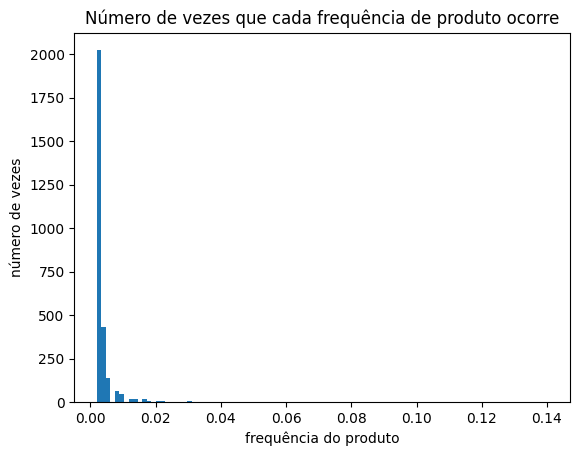

In [ ]:
plt.hist(product_frequency, bins = 100)
plt.title('Número de vezes que cada frequência de produto ocorre')
plt.xlabel('frequência do produto')
plt.ylabel('número de vezes');

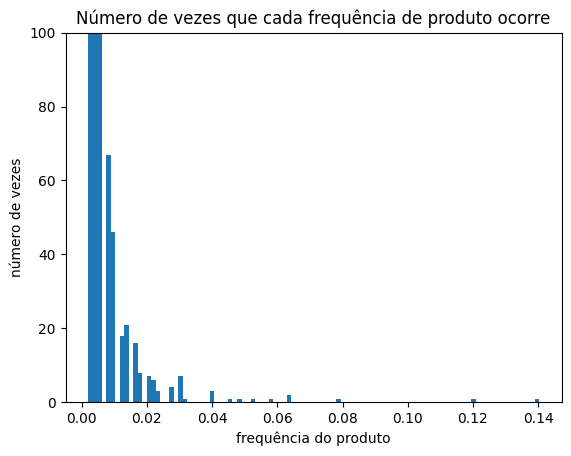

In [ ]:
plt.hist(product_frequency, bins = 100)
plt.title('Número de vezes que cada frequência de produto ocorre')
plt.xlabel('frequência do produto')
plt.ylabel('número de vezes')
plt.ylim([0, 100]);

In [ ]:
min_support = 0.01
products_apriori = product_frequency[product_frequency >= min_support]
print(products_apriori)

24852    0.140281
13176    0.120240
21903    0.078156
47209    0.064128
21137    0.064128
           ...   
35503    0.010020
12276    0.010020
19019    0.010020
44142    0.010020
47144    0.010020
Name: product_id, Length: 149, dtype: float64


In [ ]:
products_apriori.index

Int64Index([24852, 13176, 21903, 47209, 21137, 16797, 47626, 47766, 22935,
            27966,
            ...
            17461, 20119,  6873, 33198, 26165, 35503, 12276, 19019, 44142,
            47144],
           dtype='int64', length=149)

In [ ]:
transactions_apriori = transactions_df[transactions_df.product_id.isin(products_apriori.index)]
transactions_apriori

,order_id,product_id
0,2,33120
1,2,28985
5,2,17794
10,3,24838
12,3,21903
...,...,...
4975,526,1940
4982,527,49235
4988,527,21903
4989,527,35939


In [ ]:
order_sizes = transactions_apriori.order_id.value_counts()
order_sizes

431    15
493    15
265    14
426    14
359    13
       ..
156     1
427     1
65      1
155     1
115     1
Name: order_id, Length: 399, dtype: int64

In [ ]:
max(order_sizes), min(order_sizes)

(15, 1)

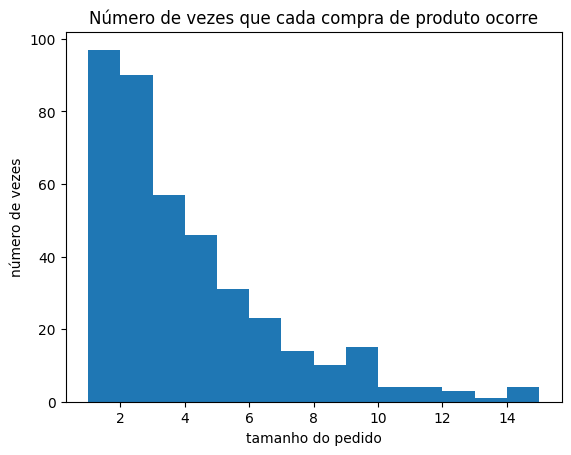

In [ ]:
plt.hist(order_sizes, bins = max(order_sizes) - min(order_sizes))
plt.title('Número de vezes que cada compra de produto ocorre')
plt.xlabel('tamanho do pedido')
plt.ylabel('número de vezes');

In [ ]:
min_lenght = 2
orders_apriori = order_sizes[order_sizes >= min_lenght]
print(orders_apriori)

431    15
493    15
265    14
426    14
359    13
       ..
307     2
305     2
126     2
127     2
326     2
Name: order_id, Length: 302, dtype: int64


In [ ]:
transactions_apriori = transactions_apriori[transactions_apriori.order_id.isin(orders_apriori.index)]
print(transactions_apriori)

      order_id  product_id
0            2       33120
1            2       28985
5            2       17794
10           3       24838
12           3       21903
...        ...         ...
4975       526        1940
4982       527       49235
4988       527       21903
4989       527       35939
4992       527       17461

[1332 rows x 2 columns]


In [ ]:
transactions_by_order = transactions_apriori.groupby('order_id')['product_id']
for order_id, order_list in transactions_by_order:
  print('Order_id:', order_id, '\nOrder_list: ', list(order_list))
  product_combinations = combinations(order_list, 2)
  print('Product combinations:')
  print([i for i in product_combinations])
  print('\n')

Order_id: 2 
Order_list:  [33120, 28985, 17794]
Product combinations:
[(33120, 28985), (33120, 17794), (28985, 17794)]


Order_id: 3 
Order_list:  [24838, 21903, 46667, 17461]
Product combinations:
[(24838, 21903), (24838, 46667), (24838, 17461), (21903, 46667), (21903, 17461), (46667, 17461)]


Order_id: 5 
Order_list:  [13176, 27966, 23909, 6184, 37011, 47209]
Product combinations:
[(13176, 27966), (13176, 23909), (13176, 6184), (13176, 37011), (13176, 47209), (27966, 23909), (27966, 6184), (27966, 37011), (27966, 47209), (23909, 6184), (23909, 37011), (23909, 47209), (6184, 37011), (6184, 47209), (37011, 47209)]


Order_id: 9 
Order_list:  [21405, 14992, 31506, 432]
Product combinations:
[(21405, 14992), (21405, 31506), (21405, 432), (14992, 31506), (14992, 432), (31506, 432)]


Order_id: 10 
Order_list:  [24852, 31717, 47766, 4605, 21137, 27156, 14992, 49235]
Product combinations:
[(24852, 31717), (24852, 47766), (24852, 4605), (24852, 21137), (24852, 27156), (24852, 14992), (24852

In [ ]:
min(1, 4)

1

In [ ]:
def product_combinations(transactions_df, max_length = 5):
  transactions_by_order = transactions_df.groupby('order_id')['product_id']
  max_length_reference = max_length
  for order_id, order_list in transactions_by_order:
    max_length = min(max_length_reference, len(order_list))
    order_list = sorted(order_list)
    for l in range(2, max_length + 1):
      product_combinations = combinations(order_list, l)
      for combination in product_combinations:
        yield combination

In [ ]:
combs = product_combinations(transactions_apriori)

In [ ]:
combs

<generator object product_combinations at 0x7a595874ccf0>

In [ ]:
next(iter(combs))

(17794, 28985)

In [ ]:
next(iter(combs))

(17794, 33120)

In [ ]:
for _ in range(100):
  print(next(iter(combs)))

(28985, 33120)
(17794, 28985, 33120)
(17461, 21903)
(17461, 24838)
(17461, 46667)
(21903, 24838)
(21903, 46667)
(24838, 46667)
(17461, 21903, 24838)
(17461, 21903, 46667)
(17461, 24838, 46667)
(21903, 24838, 46667)
(17461, 21903, 24838, 46667)
(6184, 13176)
(6184, 23909)
(6184, 27966)
(6184, 37011)
(6184, 47209)
(13176, 23909)
(13176, 27966)
(13176, 37011)
(13176, 47209)
(23909, 27966)
(23909, 37011)
(23909, 47209)
(27966, 37011)
(27966, 47209)
(37011, 47209)
(6184, 13176, 23909)
(6184, 13176, 27966)
(6184, 13176, 37011)
(6184, 13176, 47209)
(6184, 23909, 27966)
(6184, 23909, 37011)
(6184, 23909, 47209)
(6184, 27966, 37011)
(6184, 27966, 47209)
(6184, 37011, 47209)
(13176, 23909, 27966)
(13176, 23909, 37011)
(13176, 23909, 47209)
(13176, 27966, 37011)
(13176, 27966, 47209)
(13176, 37011, 47209)
(23909, 27966, 37011)
(23909, 27966, 47209)
(23909, 37011, 47209)
(27966, 37011, 47209)
(6184, 13176, 23909, 27966)
(6184, 13176, 23909, 37011)
(6184, 13176, 23909, 47209)
(6184, 13176, 27966, 3

In [ ]:
n_orders

499

In [ ]:
combs = product_combinations(transactions_apriori)
counter = Counter(combs).items()
combinations_count = pd.Series([x[1] for x in counter], index = [x[0] for x in counter])
combinations_frequency = combinations_count / n_orders
print(combinations_frequency)

(17794, 28985)                  0.006012
(17794, 33120)                  0.002004
(28985, 33120)                  0.002004
(17794, 28985, 33120)           0.002004
(17461, 21903)                  0.004008
                                  ...   
(17461, 21903, 35939)           0.002004
(17461, 21903, 49235)           0.002004
(17461, 35939, 49235)           0.002004
(21903, 35939, 49235)           0.002004
(17461, 21903, 35939, 49235)    0.002004
Length: 41452, dtype: float64


In [ ]:
min(combinations_frequency), max(combinations_frequency)

(0.002004008016032064, 0.028056112224448898)

In [ ]:
combinations_apriori = combinations_frequency[combinations_frequency >= min_support]
combinations_apriori = combinations_apriori[combinations_apriori.index.map(len) >= min_lenght]
print(combinations_apriori, len(combinations_apriori))

(13176, 27966)    0.018036
(13176, 47209)    0.018036
(27966, 47209)    0.012024
(21137, 24852)    0.014028
(21137, 47766)    0.012024
(24852, 47766)    0.012024
(21903, 24852)    0.028056
(13176, 17794)    0.010020
(13176, 43352)    0.010020
(21903, 22935)    0.010020
(16797, 39275)    0.012024
(16797, 43352)    0.010020
(24852, 49683)    0.012024
(24852, 47626)    0.014028
(37646, 47209)    0.012024
(21903, 47209)    0.012024
(21137, 21903)    0.010020
(21137, 47209)    0.010020
(13176, 22935)    0.014028
(24852, 28204)    0.016032
(24852, 45066)    0.016032
(1158, 21903)     0.010020
(9076, 24852)     0.014028
(16797, 24852)    0.010020
(13176, 21137)    0.014028
(24852, 26209)    0.014028
(12341, 16797)    0.010020
dtype: float64 27


In [ ]:
A = []
B = []
AB = []
for c in combinations_apriori.index:
  c_length = len(c)
  for l in range(1, c_length):
    comb = combinations(c, l)
    for a in comb:
      AB.append(c)
      b = list(c)
      for e in a:
        b.remove(e)
      b = tuple(b)
      if len(a) == 1:
        a = a[0]
      A.append(a)
      if len(b) == 1:
        b = b[0]
      B.append(b)

In [ ]:
apriori_df = pd.DataFrame({'A': A,
                           'B': B,
                           'AB': AB})

In [ ]:
apriori_df.head()

,A,B,AB
0,13176,27966,"(13176, 27966)"
1,27966,13176,"(13176, 27966)"
2,13176,47209,"(13176, 47209)"
3,47209,13176,"(13176, 47209)"
4,27966,47209,"(27966, 47209)"


In [ ]:
products_apriori

24852    0.140281
13176    0.120240
21903    0.078156
47209    0.064128
21137    0.064128
           ...   
35503    0.010020
12276    0.010020
19019    0.010020
44142    0.010020
47144    0.010020
Name: product_id, Length: 149, dtype: float64

In [ ]:
combinations_frequency

(17794, 28985)                  0.006012
(17794, 33120)                  0.002004
(28985, 33120)                  0.002004
(17794, 28985, 33120)           0.002004
(17461, 21903)                  0.004008
                                  ...   
(17461, 21903, 35939)           0.002004
(17461, 21903, 49235)           0.002004
(17461, 35939, 49235)           0.002004
(21903, 35939, 49235)           0.002004
(17461, 21903, 35939, 49235)    0.002004
Length: 41452, dtype: float64

In [ ]:
support = {**{k: v for k, v in products_apriori.items()},
           **{k: v for k, v in combinations_frequency.items()}}

In [ ]:
support

{24852: 0.1402805611222445,
 13176: 0.12024048096192384,
 21903: 0.0781563126252505,
 47209: 0.06412825651302605,
 21137: 0.06412825651302605,
 16797: 0.05811623246492986,
 47626: 0.052104208416833664,
 47766: 0.04809619238476954,
 22935: 0.04609218436873747,
 27966: 0.04008016032064128,
 45066: 0.04008016032064128,
 26209: 0.04008016032064128,
 27845: 0.03206412825651302,
 43352: 0.03006012024048096,
 21616: 0.03006012024048096,
 44632: 0.03006012024048096,
 49683: 0.03006012024048096,
 28204: 0.03006012024048096,
 24964: 0.03006012024048096,
 17794: 0.03006012024048096,
 31717: 0.028056112224448898,
 19660: 0.028056112224448898,
 39275: 0.028056112224448898,
 26604: 0.028056112224448898,
 4605: 0.02404809619238477,
 5876: 0.02404809619238477,
 33731: 0.02404809619238477,
 22825: 0.022044088176352707,
 37646: 0.022044088176352707,
 45007: 0.022044088176352707,
 8518: 0.022044088176352707,
 9076: 0.022044088176352707,
 30391: 0.022044088176352707,
 30489: 0.02004008016032064,
 42265: 0

In [ ]:
apriori_df[['support_A', 'support_B', 'support_AB']] = apriori_df[['A', 'B', 'AB']].applymap(lambda x: support[x])

In [ ]:
apriori_df.head()

,A,B,AB,support_A,support_B,support_AB
0,13176,27966,"(13176, 27966)",0.120240,0.040080,0.018036
1,27966,13176,"(13176, 27966)",0.040080,0.120240,0.018036
2,13176,47209,"(13176, 47209)",0.120240,0.064128,0.018036
3,47209,13176,"(13176, 47209)",0.064128,0.120240,0.018036
4,27966,47209,"(27966, 47209)",0.040080,0.064128,0.012024


In [ ]:
apriori_df.drop('AB', axis = 1, inplace=True)
apriori_df.head()

,A,B,support_A,support_B,support_AB
0,13176,27966,0.120240,0.040080,0.018036
1,27966,13176,0.040080,0.120240,0.018036
2,13176,47209,0.120240,0.064128,0.018036
3,47209,13176,0.064128,0.120240,0.018036
4,27966,47209,0.040080,0.064128,0.012024


In [ ]:
apriori_df['confidence'] = apriori_df.support_AB / apriori_df.support_A

In [ ]:
apriori_df['lift'] = apriori_df.confidence / apriori_df.support_B

In [ ]:
min_confidence = 0.2
min_lift = 1.0
apriori_df = apriori_df[apriori_df.confidence >= min_confidence]
apriori_df = apriori_df[apriori_df.lift >= min_lift]

In [ ]:
apriori_df = apriori_df.sort_values(by = 'lift', ascending=False).reset_index(drop = True)
apriori_df.head()

,A,B,support_A,support_B,support_AB,confidence,lift
0,12341,16797,0.018036,0.058116,0.010020,0.555556,9.559387
1,1158,21903,0.014028,0.078156,0.010020,0.714286,9.139194
2,37646,47209,0.022044,0.064128,0.012024,0.545455,8.505682
3,16797,39275,0.058116,0.028056,0.012024,0.206897,7.374384
4,39275,16797,0.028056,0.058116,0.012024,0.428571,7.374384


In [ ]:
products_id_to_name[12341]

'Hass Avocados'

In [ ]:
def convert_product_id_to_name(product_ids):
  if type(product_ids) == int:
    return products_id_to_name[product_ids]
  names = []
  for prod in product_ids:
    name = products_id_to_name[prod]
    names.append(name)
  names = tuple(names)
  return names

In [ ]:
apriori_df[['A', 'B']] = apriori_df[['A', 'B']].applymap(convert_product_id_to_name)
apriori_df

,A,B,support_A,support_B,support_AB,confidence,lift
0,Hass Avocados,Strawberries,0.018036,0.058116,0.010020,0.555556,9.559387
1,Mango Chunks,Organic Baby Spinach,0.014028,0.078156,0.010020,0.714286,9.139194
2,Organic Gala Apples,Organic Hass Avocado,0.022044,0.064128,0.012024,0.545455,8.505682
3,Strawberries,Organic Blueberries,0.058116,0.028056,0.012024,0.206897,7.374384
4,Organic Blueberries,Strawberries,0.028056,0.058116,0.012024,0.428571,7.374384
5,Raspberries,Strawberries,0.030060,0.058116,0.010020,0.333333,5.735632
6,Organic Raspberries,Organic Hass Avocado,0.040080,0.064128,0.012024,0.300000,4.678125
7,Blueberries,Banana,0.022044,0.140281,0.014028,0.636364,4.536364
8,Organic Avocado,Organic Strawberries,0.048096,0.064128,0.012024,0.250000,3.898438
9,Organic Fuji Apple,Banana,0.030060,0.140281,0.016032,0.533333,3.801905


#### Demonstração com o algoritimo APRIORI

In [ ]:
order_products_names.head()

,order_id,product_id,add_to_cart_order,reordered,product_name
0,2,33120,1.0,1.0,Organic Egg Whites
1,2,28985,2.0,1.0,Michigan Organic Kale
2,2,9327,3.0,0.0,Garlic Powder
3,2,45918,4.0,1.0,Coconut Butter
4,2,30035,5.0,0.0,Natural Sweetener


In [ ]:
def data_products(df):
    products=[]
    for i in range(len(df)):
        product = df['product_name'][i]
        products.append(product)

    return pd.DataFrame(products)

In [ ]:
df_preparation = order_products_names.drop(['product_id', 'add_to_cart_order','reordered'], axis=1)
df_preparation

,order_id,product_name
0,2,Organic Egg Whites
1,2,Michigan Organic Kale
2,2,Garlic Powder
3,2,Coconut Butter
4,2,Natural Sweetener
...,...,...
851639,90230,Baby Spinach Salad
851640,90230,Multigrain Wheat Thins Crackers
851641,90230,Banana
851642,90230,Sparkling Water Grapefruit


In [ ]:
df_preparation = df_preparation.groupby("order_id")["product_name"].apply(list)

In [ ]:
df_preparation = df_preparation.reset_index().drop('order_id', axis=1)

In [ ]:
df_products = data_products(df_preparation)

In [ ]:
transactions_products = df_products.values.tolist()

In [ ]:
for i in range(len(transactions_products)) :
    for j in range(len(transactions_products[i])) :
        transactions_products[i][j] = str(transactions_products[i][j])
transactions_products

**Apriori**

In [ ]:
rules = apriori(transactions = transactions_products, min_support = 0.005, min_cofindence = 0.2, min_lift = 2, min_length = 2, max_length = 2)

In [ ]:
results = list(rules)

In [ ]:
len(results)

38

In [ ]:
results

[RelationRecord(items=frozenset({'Apple Honeycrisp Organic', 'Bag of Organic Bananas'}), support=0.007304007174210601, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Apple Honeycrisp Organic'}), items_add=frozenset({'Bag of Organic Bananas'}), confidence=0.2742578644217989, lift=2.291963858990101), OrderedStatistic(items_base=frozenset({'Bag of Organic Bananas'}), items_add=frozenset({'Apple Honeycrisp Organic'}), confidence=0.06103934523222562, lift=2.291963858990101)]),
 RelationRecord(items=frozenset({'Apple Honeycrisp Organic', 'Organic Strawberries'}), support=0.005144664180865625, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Apple Honeycrisp Organic'}), items_add=frozenset({'Organic Strawberries'}), confidence=0.19317678334071775, lift=2.3404354588361898), OrderedStatistic(items_base=frozenset({'Organic Strawberries'}), items_add=frozenset({'Apple Honeycrisp Organic'}), confidence=0.06233023588277341, lift=2.34043545883619)]),
 RelationRecord(items=fro

In [ ]:
def inspect(results):
    lhs         = [tuple(result[2][0][0])[0] for result in results]
    rhs         = [tuple(result[2][0][1])[0] for result in results]
    supports    = [result[1] for result in results]
    confidences = [result[2][0][2] for result in results]
    lifts       = [result[2][0][3] for result in results]
    return list(zip(lhs, rhs, supports, confidences, lifts))

resultsinDataFrame = pd.DataFrame(inspect(results), columns = ['Left Hand Side', 'Right Hand Side', 'Support', 'Confidence', 'Lift'])

In [ ]:
resultsinDataFrame

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
0,Apple Honeycrisp Organic,Bag of Organic Bananas,0.007304,0.274258,2.291964
1,Apple Honeycrisp Organic,Organic Strawberries,0.005145,0.193177,2.340435
2,Bag of Organic Bananas,Organic Cucumber,0.006561,0.054827,2.232808
3,Bag of Organic Bananas,Organic Gala Apples,0.006608,0.055221,2.352892
4,Bag of Organic Bananas,Organic Hass Avocado,0.019351,0.161720,2.438688
5,Bag of Organic Bananas,Organic Large Extra Fancy Fuji Apple,0.007339,0.061335,2.631916
6,Bag of Organic Bananas,Organic Lemon,0.007564,0.063209,2.266955
7,Bag of Organic Bananas,Organic Raspberries,0.012814,0.107090,2.520318
8,Banana,Blueberries,0.005451,0.036658,2.047915
9,Banana,Cucumber Kirby,0.010219,0.068714,2.255367


In [ ]:
resultsinDataFrame.nlargest(n = 100, columns = 'Lift')

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
19,Limes,Organic Cilantro,0.005404,0.125342,5.950976
30,Organic Garlic,Organic Yellow Onion,0.006631,0.197748,5.713861
15,Large Lemon,Limes,0.008390,0.176558,4.094953
31,Organic Hass Avocado,Organic Lemon,0.007044,0.106228,3.809814
28,Organic Cucumber,Organic Hass Avocado,0.005345,0.217684,3.282610
16,Large Lemon,Organic Avocado,0.007965,0.167619,3.103635
18,Limes,Organic Avocado,0.006773,0.157088,2.908653
36,Organic Raspberries,Organic Strawberries,0.010030,0.236046,2.859812
32,Organic Hass Avocado,Organic Raspberries,0.007918,0.119395,2.809911
22,Organic Baby Spinach,Organic Cucumber,0.005121,0.068078,2.772470
